<a href="https://colab.research.google.com/github/evgeny-kolonsky/gaza-news/blob/main/Death_toll.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Death toll view

get data collected from Goggle News with keyword 'Gaza'

filter 'death poll' mentions and plot on timeline plot.

In [1]:
import pandas as pd
from urllib.request import urlopen
import altair as alt
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as soup
import requests

## Extract news headlines with `death toll` mention

In [2]:
url = "https://raw.githubusercontent.com/evgeny-kolonsky/gaza-news/main/gaza-news.txt"

exclude_numbers = [7, 250, 240, 239, 1200] # Oct 7; 250, 240, 239 hostages; 1200 Israelis killed

def extract_biggest_number(text):
  numbers = [int(s) for s in text.split() if s.isdigit()]
  numbers = [n for n in numbers if n not in exclude_numbers]
  numbers.sort(reverse=True)
  if len(numbers) > 0:
    return numbers[0]
  else:
    return 0

txt = ''
data = urlopen(url).readlines()
for line in data:
  line = line.decode().lower().strip()
  try:
    date, publisher, title, origin = line.split('\t')
  except:
    continue
  title = title.replace(',','') # to read numbers such as 10,000 with comma
  if 'death toll' in title:
    number = extract_biggest_number(title)
    if number > 0:
      txt += f'{date}\t{number}\t{publisher}\t{title}\t{origin}\n'

filename = 'death-toll.tsv'
with open(filename, 'w') as f:
  f.write('date\ttoll\tpublisher\ttitle\torigin\n')
  f.write(txt)

## Load filter data as `pandas dataframe`

In [4]:
dtypes ={'date': 'str',
                  'toll': 'int',
                  'publisher': 'str',
                  'title': 'str',
                  'url': 'str'}
df  = pd.read_csv('death-toll.tsv', delimiter='\t',
                  dtype=dtypes, date_format="%Y-%m-%d")
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,toll,publisher,title,origin
0,2023-10-17,3478,anadolu agency | english,palestinian death toll in gaza conflict rises ...,https://news.google.com/rss/articles/cbmifwh0d...
1,2023-10-18,4000,reliefweb,israel destroys a quarter of northern gaza str...,https://reliefweb.int/report/occupied-palestin...
2,2023-10-22,5000,united nations sustainable development group,unsdg | gaza death toll passes 5000 with no ce...,https://unsdg.un.org/latest/stories/gaza-death...
3,2023-10-22,5000,un news,israel-palestine: gaza death toll passes 5000 ...,https://news.google.com/rss/articles/cbmilgh0d...
4,2023-10-22,5000,al jazeera english,gaza death toll tops 5000 nearly half of them ...,https://www.aljazeera.com/news/2023/10/23/gaza...


## Plot timeline data

### Simple plot

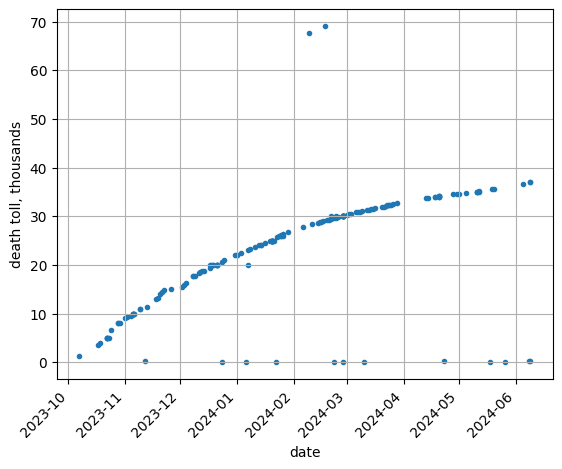

In [4]:
plt.scatter(df['date'], df['toll']/1000, marker='.')
plt.grid()
plt.xlabel('date')
plt.ylabel('death toll, thousands')
plt.xticks(rotation=45, ha='right');

### Interactive plot

In [5]:
alt.Chart(df).mark_point().encode(
    x='date',
    y='toll',
    tooltip=['date', 'publisher', 'title', 'origin'],
).interactive()

alt.Chart(...)

# Combatants mention

In [6]:
!pip install newspaper3k

In [3]:
from newspaper import Article

In [4]:
url = "https://raw.githubusercontent.com/evgeny-kolonsky/gaza-news/main/gaza-news.txt"

keywords = ['combatants', 'fighters','militants']

def extract_sentence(text, keyword):
    return [sentence.strip() for sentence in text.split('.') if any([key in sentence for key in keywords])]

txt = ''
data = urlopen(url).readlines()
for line in data:
  line = line.decode().lower().strip()
  try:
    date, publisher, title, origin = line.split('\t')
  except:
    continue
  if 'death toll' in title:
    article = Article(origin)
    try:
      article.download()
      article.parse()
      sentences = extract_sentence(article.text, keywords)
      sentences_with_numbers = [sentence for sentence in sentences if extract_biggest_number(sentence) > 0]
      if len(sentences_with_numbers) > 0:
        print(date, origin)
        for sentence in sentences_with_numbers:
            print('\t>', sentence)
    except:
      pass

2023-10-07 https://apnews.com/article/israel-palestinians-gaza-hamas-rockets-airstrikes-tel-aviv-ca7903976387cfc1e1011ce9ea805a71
	> More than 40 hours after Hamas launched its unprecedented incursion out of Gaza, Israeli forces were still battling with militants holed up in several locations
	> An Israeli official said security forces have killed 400 militants and captured dozens more
2023-10-07 https://www.aljazeera.com/news/liveblog/2023/10/8/israel-palestine-escalation-live-israeli-forces-bombard-gaza
	> Israel-Hamas war updates: Death toll rises as Israeli jets pound Gaza

These are the updates for the escalation between Palestinian fighters and Israel military on Sunday, October 8, 2023
2023-11-12 https://www.washingtonpost.com/world/interactive/2023/gaza-rising-death-toll-civilians/
	> 7, Hamas militants overran southern Israel, killing around 1,200 people and taking more than 230 hostages, according to Israel’s Foreign Ministry
2023-12-01 https://www.pbs.org/newshour/world/isra